<a href="https://colab.research.google.com/github/RamsRD/desafio-alura-telecom-x-1/blob/main/TelecomX_LATAM_de_Rams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desaf√≠o Telecom X LATAM 1**

#üìå Extracci√≥n

##Importaci√≥n de datos

In [2]:
#Importamos la biblioteca de pandas, numpy, matplotlib y seaborn para manipulaci√≥n de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importando entrop√≠a de Scipy.stats
from scipy.stats import entropy

#Mostrar todas las columnas, sin truncarlas
pd.set_option('display.max_columns', None)

#Mostrar todas las filas, sin truncarlas
pd.set_option('display.max_rows', None)

In [3]:
#URLs del archivo .json con los datos de Telecom X
url1 = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

#Leyendo los archivos .json y almacenando los datos en un DataFrame
datos = pd.read_json(url1)

##Analizando los datos

In [4]:
#Viendo el tama√±o de los datos
datos.shape

(7267, 6)

In [5]:
#Viendo los primeros 6 datos
datos.head(6)

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
5  0013-MHZWF    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
5   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   
5  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...  
5  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [6]:
#Viendo los metadatos de los datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#üîß Transformaci√≥n

##Transformando los datos del DataFrame

In [7]:
#Aplanar columnas anidadas y crear nuevos DataFrames usando pd_json_normalize
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

#Unir todas las columnas usando pd.concat en un solo DataFrame; eliminando columnas originales para evitar duplicados
datos_transformados = pd.concat(
    [
        datos.drop(columns=['customer', 'phone', 'internet', 'account']),
        df_customer,
        df_phone,
        df_internet,
        df_account
    ],
    axis=1
)

#Renombrar columnas para evitar caracteres especiales y lograr consistencia
datos_transformados.columns = datos_transformados.columns.str.replace('.', '_', regex=False)

#Convertir columnas num√©ricas que puedan estar como texto
datos_transformados['Charges_Monthly'] = pd.to_numeric(datos_transformados['Charges_Monthly'], errors='coerce')
datos_transformados['Charges_Total'] = pd.to_numeric(datos_transformados['Charges_Total'], errors='coerce')

#Imprimir los resultados para ver c√≥mo qued√≥
print(datos_transformados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


##Revisando los cambios

In [8]:
#Viendo las primeras 6 filas de los datos
datos_transformados.head(6)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   
5  0013-MHZWF    No  Female              0      No        Yes       9   

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0          Yes            No             DSL             No          Yes   
1          Yes           Yes             DSL             No           No   
2          Yes            No     Fiber optic             No           No   
3          Yes            No     Fiber optic             No          Yes   
4          Yes            No     Fiber optic             No           No   
5          Yes            No             DSL             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1               No          No          No             Yes  Month-to-month   
2              Yes          No          No              No  Month-to-month   
3              Yes          No         Yes             Yes  Month-to-month   
4               No         Yes         Yes              No  Month-to-month   
5               No         Yes         Yes             Yes  Month-to-month   

  PaperlessBilling            PaymentMethod  Charges_Monthly  Charges_Total  
0              Yes             Mailed check             65.6         593.30  
1               No             Mailed check             59.9         542.40  
2              Yes         Electronic check             73.9         280.85  
3              Yes         Electronic check             98.0        1237.85  
4              Yes             Mailed check             83.9         267.40  
5              Yes  Credit card (automatic)             69.4         571.45

In [9]:
#Revisar valores faltantes
print("Valores nulos por columna:")
print(datos_transformados.isnull().sum())

Valores nulos por columna:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges_Monthly      0
Charges_Total       11
dtype: int64


##Comprobaci√≥n de los datos y manejo de inconsistencias

In [10]:
#Buscar duplicados por customerID
duplicados = datos_transformados.duplicated(subset='customerID').sum()
print(f"Duplicados encontrados: {duplicados}")

#Estandarizar texto: todo en min√∫sculas para variables categ√≥ricas
columnas_objeto = datos_transformados.select_dtypes(include='object').columns
datos_transformados[columnas_objeto] = datos_transformados[columnas_objeto].apply(lambda x: x.str.strip().str.lower())

#Verificaci√≥n final
datos_transformados.head(6)

Duplicados encontrados: 0


customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-orfbo    no  female              0     yes        yes       9   
1  0003-mknfe    no    male              0      no         no       9   
2  0004-tlhlj   yes    male              0      no         no       4   
3  0011-igkff   yes    male              1     yes         no      13   
4  0013-exchz   yes  female              1     yes         no       3   
5  0013-mhzwf    no  female              0      no        yes       9   

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0          yes            no             dsl             no          yes   
1          yes           yes             dsl             no           no   
2          yes            no     fiber optic             no           no   
3          yes            no     fiber optic             no          yes   
4          yes            no     fiber optic             no           no   
5          yes            no             dsl             no           no   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               no         yes         yes              no        one year   
1               no          no          no             yes  month-to-month   
2              yes          no          no              no  month-to-month   
3              yes          no         yes             yes  month-to-month   
4               no         yes         yes              no  month-to-month   
5               no         yes         yes             yes  month-to-month   

  PaperlessBilling            PaymentMethod  Charges_Monthly  Charges_Total  
0              yes             mailed check             65.6         593.30  
1               no             mailed check             59.9         542.40  
2              yes         electronic check             73.9         280.85  
3              yes         electronic check             98.0        1237.85  
4              yes             mailed check             83.9         267.40  
5              yes  credit card (automatic)             69.4         571.45

In [11]:
#Reemplazar valores nulos en Charges_Total por 0
datos_transformados['Charges_Total'] = datos_transformados['Charges_Total'].fillna(0)

#Eliminar duplicados por customerID
datos_transformados = datos_transformados.drop_duplicates(subset='customerID')

#Estandarizar variables categ√≥ricas (min√∫sculas y sin espacios)
columnas_objeto = datos_transformados.select_dtypes(include='object').columns
datos_transformados[columnas_objeto] = datos_transformados[columnas_objeto].apply(lambda x: x.str.strip().str.lower())

#Revisar resultados
datos_transformados.head(6)

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-orfbo    no  female              0     yes        yes       9   
1  0003-mknfe    no    male              0      no         no       9   
2  0004-tlhlj   yes    male              0      no         no       4   
3  0011-igkff   yes    male              1     yes         no      13   
4  0013-exchz   yes  female              1     yes         no       3   
5  0013-mhzwf    no  female              0      no        yes       9   

  PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup  \
0          yes            no             dsl             no          yes   
1          yes           yes             dsl             no           no   
2          yes            no     fiber optic             no           no   
3          yes            no     fiber optic             no          yes   
4          yes            no     fiber optic             no           no   
5          yes            no             dsl             no           no   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               no         yes         yes              no        one year   
1               no          no          no             yes  month-to-month   
2              yes          no          no              no  month-to-month   
3              yes          no         yes             yes  month-to-month   
4               no         yes         yes              no  month-to-month   
5               no         yes         yes             yes  month-to-month   

  PaperlessBilling            PaymentMethod  Charges_Monthly  Charges_Total  
0              yes             mailed check             65.6         593.30  
1               no             mailed check             59.9         542.40  
2              yes         electronic check             73.9         280.85  
3              yes         electronic check             98.0        1237.85  
4              yes             mailed check             83.9         267.40  
5              yes  credit card (automatic)             69.4         571.45

In [12]:
# Verificar tipos de datos y su consistencia
print(datos_transformados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [13]:
#Revisar si quedan valores nulos
print("\nValores nulos despu√©s de la limpieza:")
print(datos_transformados.isnull().sum())


Valores nulos despu√©s de la limpieza:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges_Monthly     0
Charges_Total       0
dtype: int64


##Creaci√≥n de la columna "cuentas diarias"

In [14]:
#Crear la columna Cuentas_Diarias a partir de Charges_Monthly
datos_transformados['Cuentas_Diarias'] = datos_transformados['Charges_Monthly'] / 30

#Redondear a 2 decimales para mejor claridad
datos_transformados['Cuentas_Diarias'] = datos_transformados['Cuentas_Diarias'].round(2)

#Verificaci√≥n de los cambios
datos_transformados[['Charges_Monthly', 'Cuentas_Diarias']].head()

Charges_Monthly  Cuentas_Diarias
0             65.6             2.19
1             59.9             2.00
2             73.9             2.46
3             98.0             3.27
4             83.9             2.80

##Observando las variables de los datos de las columnas

In [15]:
#Observando las variables de los datos usando .unique
print(datos_transformados['customerID'].unique())
print(datos_transformados['Churn'].unique())
print(datos_transformados['gender'].unique())
print(datos_transformados['SeniorCitizen'].unique())
print(datos_transformados['Partner'].unique())
print(datos_transformados['Dependents'].unique())
print(datos_transformados['tenure'].unique())

['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']
['no' 'yes' '']
['female' 'male']
[0 1]
['yes' 'no']
['yes' 'no']
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]


In [16]:
#Observando las variables de los datos usando .unique
print(datos_transformados['PhoneService'].unique())
print(datos_transformados['MultipleLines'].unique())
print(datos_transformados['InternetService'].unique())
print(datos_transformados['DeviceProtection'].unique())
print(datos_transformados['TechSupport'].unique())

['yes' 'no']
['no' 'yes' 'no phone service']
['dsl' 'fiber optic' 'no']
['no' 'yes' 'no internet service']
['yes' 'no' 'no internet service']


In [17]:
#Observando las variables de los datos usando.unique
print(datos_transformados['OnlineSecurity'].unique)

<bound method Series.unique of 0                        no
1                        no
2                        no
3                        no
4                        no
5                        no
6                       yes
7                       yes
8                       yes
9                       yes
10                      yes
11                      yes
12                       no
13                      yes
14                      yes
15                       no
16                      yes
17                       no
18                      yes
19                       no
20      no internet service
21                       no
22                       no
23      no internet service
24      no internet service
25                      yes
26                       no
27      no internet service
28      no internet service
29      no internet service
30                      yes
31                       no
32      no internet service
33                      yes
34      no intern

In [18]:
#Observando las variables de los datos usando .unique
print(datos_transformados['OnlineBackup'].unique())
print(datos_transformados['StreamingTV'].unique())
print(datos_transformados['StreamingMovies'].unique())
print(datos_transformados['Contract'].unique())
print(datos_transformados['PaperlessBilling'].unique())
print(datos_transformados['PaymentMethod'].unique())

['yes' 'no' 'no internet service']
['yes' 'no' 'no internet service']
['no' 'yes' 'no internet service']
['one year' 'month-to-month' 'two year']
['yes' 'no']
['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']


##Estandarizaci√≥n de los datos: traducirlas al espa√±ol y ajustar sus variables

In [19]:
#Renombrar columnas para que est√©n en espa√±ol
nuevos_nombres = {
    'customerID': 'ID Cliente',
    'Churn': 'Tasa de Abandono (Churn)',
    'gender': 'G√©nero',
    'SeniorCitizen': 'Adulto Mayor',
    'Partner': 'Tiene Pareja',
    'Dependents': 'Tiene Dependientes',
    'tenure': 'Meses de Contrato',
    'PhoneService': 'Servicio Telef√≥nico',
    'MultipleLines': 'M√∫ltiples L√≠neas',
    'InternetService': 'Tipo de Internet',
    'OnlineSecurity': 'Seguridad en L√≠nea',
    'OnlineBackup': 'Respaldo en L√≠nea',
    'DeviceProtection': 'Protecci√≥n del Equipo',
    'TechSupport': 'Soporte T√©cnico',
    'StreamingTV': 'TV Streaming',
    'StreamingMovies': 'Pel√≠culas Streaming',
    'Contract': 'Tipo de Contrato',
    'PaperlessBilling': 'Facturaci√≥n en L√≠nea',
    'PaymentMethod': 'M√©todo de Pago',
    'Charges_Monthly': 'Cargo Mensual',
    'Charges_Total': 'Cargo Total',
    'Cuentas_Diarias': 'Cargo Diario'

}
datos_transformados.rename(columns=nuevos_nombres, inplace=True)

#Vista previa de los cambios
datos_transformados.head(6)

ID Cliente Tasa de Abandono (Churn)  G√©nero  Adulto Mayor Tiene Pareja  \
0  0002-orfbo                       no  female             0          yes   
1  0003-mknfe                       no    male             0           no   
2  0004-tlhlj                      yes    male             0           no   
3  0011-igkff                      yes    male             1          yes   
4  0013-exchz                      yes  female             1          yes   
5  0013-mhzwf                       no  female             0           no   

  Tiene Dependientes  Meses de Contrato Servicio Telef√≥nico M√∫ltiples L√≠neas  \
0                yes                  9                 yes               no   
1                 no                  9                 yes              yes   
2                 no                  4                 yes               no   
3                 no                 13                 yes               no   
4                 no                  3                 yes               no   
5                yes                  9                 yes               no   

  Tipo de Internet Seguridad en L√≠nea Respaldo en L√≠nea Protecci√≥n del Equipo  \
0              dsl                 no               yes                    no   
1              dsl                 no                no                    no   
2      fiber optic                 no                no                   yes   
3      fiber optic                 no               yes                   yes   
4      fiber optic                 no                no                    no   
5              dsl                 no                no                    no   

  Soporte T√©cnico TV Streaming Pel√≠culas Streaming Tipo de Contrato  \
0             yes          yes                  no         one year   
1              no           no                 yes   month-to-month   
2              no           no                  no   month-to-month   
3              no          yes                 yes   month-to-month   
4             yes          yes                  no   month-to-month   
5             yes          yes                 yes   month-to-month   

  Facturaci√≥n en L√≠nea           M√©todo de Pago  Cargo Mensual  Cargo Total  \
0                  yes             mailed check           65.6       593.30   
1                   no             mailed check           59.9       542.40   
2                  yes         electronic check           73.9       280.85   
3                  yes         electronic check           98.0      1237.85   
4                  yes             mailed check           83.9       267.40   
5                  yes  credit card (automatic)           69.4       571.45   

   Cargo Diario  
0          2.19  
1          2.00  
2          2.46  
3          3.27  
4          2.80  
5          2.31

In [20]:
#Traducir y capitalizar G√©nero
datos_transformados['G√©nero'] = datos_transformados['G√©nero'].map({
    'female': 'Femenino',
    'male': 'Masculino'
})

In [21]:
#Lista de columnas para inspeccionar
columnas_a_revisar = [
    'ID Cliente', 'Tasa de Abandono (Churn)', 'G√©nero', 'Adulto Mayor', 'Tiene Pareja', 'Tiene Dependientes',
    'Servicio Telef√≥nico', 'M√∫ltiples L√≠neas', 'Tipo de Internet', 'Seguridad en L√≠nea',
    'Respaldo en L√≠nea', 'Protecci√≥n del Equipo', 'Soporte T√©cnico', 'TV Streaming',
    'Pel√≠culas Streaming', 'Tipo de Contrato', 'Facturaci√≥n en L√≠nea', 'M√©todo de Pago',
]

#Mostrar valores √∫nicos para cada columna, ordenadamente
for col in columnas_a_revisar:
    valores_unicos = datos_transformados[col].unique()
    print(f"Columna: {col}")
    print(f"Valores √∫nicos ({len(valores_unicos)}): {valores_unicos}\n")

Columna: ID Cliente
Valores √∫nicos (7267): ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Columna: Tasa de Abandono (Churn)
Valores √∫nicos (3): ['no' 'yes' '']

Columna: G√©nero
Valores √∫nicos (2): ['Femenino' 'Masculino']

Columna: Adulto Mayor
Valores √∫nicos (2): [0 1]

Columna: Tiene Pareja
Valores √∫nicos (2): ['yes' 'no']

Columna: Tiene Dependientes
Valores √∫nicos (2): ['yes' 'no']

Columna: Servicio Telef√≥nico
Valores √∫nicos (2): ['yes' 'no']

Columna: M√∫ltiples L√≠neas
Valores √∫nicos (3): ['no' 'yes' 'no phone service']

Columna: Tipo de Internet
Valores √∫nicos (3): ['dsl' 'fiber optic' 'no']

Columna: Seguridad en L√≠nea
Valores √∫nicos (3): ['no' 'yes' 'no internet service']

Columna: Respaldo en L√≠nea
Valores √∫nicos (3): ['yes' 'no' 'no internet service']

Columna: Protecci√≥n del Equipo
Valores √∫nicos (3): ['no' 'yes' 'no internet service']

Columna: Soporte T√©cnico
Valores √∫nicos (3): ['yes' 'no' 'no internet service']


##Ajustando la columna de adulto mayor

In [22]:
#Ajustar la columna de Adulto Mayor para que sea object y acepte valores n√∫mericos
datos_transformados['Adulto Mayor'] = datos_transformados['Adulto Mayor'].map({0: 'No', 1: 'S√≠'})

In [23]:
#Lista con las columnas binarias que queremos mapear
binarias = [
    'Tiene Pareja',
    'Tiene Dependientes',
    'Servicio Telef√≥nico',
    'Facturaci√≥n en L√≠nea',
]

for col in binarias:
    if col in datos_transformados.columns:
        datos_transformados[col] = datos_transformados[col].map({'yes': 'S√≠', 'no': 'No'})

In [24]:
#Vista previa de los cambios
datos_transformados.head(6)

ID Cliente Tasa de Abandono (Churn)     G√©nero Adulto Mayor Tiene Pareja  \
0  0002-orfbo                       no   Femenino           No           S√≠   
1  0003-mknfe                       no  Masculino           No           No   
2  0004-tlhlj                      yes  Masculino           No           No   
3  0011-igkff                      yes  Masculino           S√≠           S√≠   
4  0013-exchz                      yes   Femenino           S√≠           S√≠   
5  0013-mhzwf                       no   Femenino           No           No   

  Tiene Dependientes  Meses de Contrato Servicio Telef√≥nico M√∫ltiples L√≠neas  \
0                 S√≠                  9                  S√≠               no   
1                 No                  9                  S√≠              yes   
2                 No                  4                  S√≠               no   
3                 No                 13                  S√≠               no   
4                 No                  3                  S√≠               no   
5                 S√≠                  9                  S√≠               no   

  Tipo de Internet Seguridad en L√≠nea Respaldo en L√≠nea Protecci√≥n del Equipo  \
0              dsl                 no               yes                    no   
1              dsl                 no                no                    no   
2      fiber optic                 no                no                   yes   
3      fiber optic                 no               yes                   yes   
4      fiber optic                 no                no                    no   
5              dsl                 no                no                    no   

  Soporte T√©cnico TV Streaming Pel√≠culas Streaming Tipo de Contrato  \
0             yes          yes                  no         one year   
1              no           no                 yes   month-to-month   
2              no           no                  no   month-to-month   
3              no          yes                 yes   month-to-month   
4             yes          yes                  no   month-to-month   
5             yes          yes                 yes   month-to-month   

  Facturaci√≥n en L√≠nea           M√©todo de Pago  Cargo Mensual  Cargo Total  \
0                   S√≠             mailed check           65.6       593.30   
1                   No             mailed check           59.9       542.40   
2                   S√≠         electronic check           73.9       280.85   
3                   S√≠         electronic check           98.0      1237.85   
4                   S√≠             mailed check           83.9       267.40   
5                   S√≠  credit card (automatic)           69.4       571.45   

   Cargo Diario  
0          2.19  
1          2.00  
2          2.46  
3          3.27  
4          2.80  
5          2.31

In [25]:
#Revisar si quedan valores nulos
print("\nValores nulos despu√©s de la limpieza:")
print(datos_transformados.isnull().sum())


Valores nulos despu√©s de la limpieza:
ID Cliente                  0
Tasa de Abandono (Churn)    0
G√©nero                      0
Adulto Mayor                0
Tiene Pareja                0
Tiene Dependientes          0
Meses de Contrato           0
Servicio Telef√≥nico         0
M√∫ltiples L√≠neas            0
Tipo de Internet            0
Seguridad en L√≠nea          0
Respaldo en L√≠nea           0
Protecci√≥n del Equipo       0
Soporte T√©cnico             0
TV Streaming                0
Pel√≠culas Streaming         0
Tipo de Contrato            0
Facturaci√≥n en L√≠nea        0
M√©todo de Pago              0
Cargo Mensual               0
Cargo Total                 0
Cargo Diario                0
dtype: int64


##Ajustando la columna de tasa de abandono (churn)

In [26]:
#Definir funci√≥n para mapear y traducir valores
def mapear_churn(valor):
    if pd.isna(valor) or valor == '':
        #Consideramos vac√≠os o nulos como 'No' (cliente no abandon√≥)
        return 'No'
    valor = str(valor).strip().lower()
    if valor == 'yes':
        return 'S√≠'
    elif valor == 'no':
        return 'No'
    else:
        #Por si hay valores inesperados, los consideramos como 'No'
        return 'No'

#Aplicar la funci√≥n a la columna
datos_transformados['Tasa de Abandono (Churn)'] = datos_transformados['Tasa de Abandono (Churn)'].apply(mapear_churn)

In [27]:
#Vista previa de los cambios
datos_transformados.head(6)

ID Cliente Tasa de Abandono (Churn)     G√©nero Adulto Mayor Tiene Pareja  \
0  0002-orfbo                       No   Femenino           No           S√≠   
1  0003-mknfe                       No  Masculino           No           No   
2  0004-tlhlj                       S√≠  Masculino           No           No   
3  0011-igkff                       S√≠  Masculino           S√≠           S√≠   
4  0013-exchz                       S√≠   Femenino           S√≠           S√≠   
5  0013-mhzwf                       No   Femenino           No           No   

  Tiene Dependientes  Meses de Contrato Servicio Telef√≥nico M√∫ltiples L√≠neas  \
0                 S√≠                  9                  S√≠               no   
1                 No                  9                  S√≠              yes   
2                 No                  4                  S√≠               no   
3                 No                 13                  S√≠               no   
4                 No                  3                  S√≠               no   
5                 S√≠                  9                  S√≠               no   

  Tipo de Internet Seguridad en L√≠nea Respaldo en L√≠nea Protecci√≥n del Equipo  \
0              dsl                 no               yes                    no   
1              dsl                 no                no                    no   
2      fiber optic                 no                no                   yes   
3      fiber optic                 no               yes                   yes   
4      fiber optic                 no                no                    no   
5              dsl                 no                no                    no   

  Soporte T√©cnico TV Streaming Pel√≠culas Streaming Tipo de Contrato  \
0             yes          yes                  no         one year   
1              no           no                 yes   month-to-month   
2              no           no                  no   month-to-month   
3              no          yes                 yes   month-to-month   
4             yes          yes                  no   month-to-month   
5             yes          yes                 yes   month-to-month   

  Facturaci√≥n en L√≠nea           M√©todo de Pago  Cargo Mensual  Cargo Total  \
0                   S√≠             mailed check           65.6       593.30   
1                   No             mailed check           59.9       542.40   
2                   S√≠         electronic check           73.9       280.85   
3                   S√≠         electronic check           98.0      1237.85   
4                   S√≠             mailed check           83.9       267.40   
5                   S√≠  credit card (automatic)           69.4       571.45   

   Cargo Diario  
0          2.19  
1          2.00  
2          2.46  
3          3.27  
4          2.80  
5          2.31

In [28]:
#Revisar si quedan valores nulos
print("\nValores nulos despu√©s de la limpieza:")
print(datos_transformados.isnull().sum())


Valores nulos despu√©s de la limpieza:
ID Cliente                  0
Tasa de Abandono (Churn)    0
G√©nero                      0
Adulto Mayor                0
Tiene Pareja                0
Tiene Dependientes          0
Meses de Contrato           0
Servicio Telef√≥nico         0
M√∫ltiples L√≠neas            0
Tipo de Internet            0
Seguridad en L√≠nea          0
Respaldo en L√≠nea           0
Protecci√≥n del Equipo       0
Soporte T√©cnico             0
TV Streaming                0
Pel√≠culas Streaming         0
Tipo de Contrato            0
Facturaci√≥n en L√≠nea        0
M√©todo de Pago              0
Cargo Mensual               0
Cargo Total                 0
Cargo Diario                0
dtype: int64


In [29]:
#Mostrar valores √∫nicos para cada columna, ordenadamente
for col in columnas_a_revisar:
    valores_unicos = datos_transformados[col].unique()
    print(f"Columna: {col}")
    print(f"Valores √∫nicos ({len(valores_unicos)}): {valores_unicos}\n")

Columna: ID Cliente
Valores √∫nicos (7267): ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']

Columna: Tasa de Abandono (Churn)
Valores √∫nicos (2): ['No' 'S√≠']

Columna: G√©nero
Valores √∫nicos (2): ['Femenino' 'Masculino']

Columna: Adulto Mayor
Valores √∫nicos (2): ['No' 'S√≠']

Columna: Tiene Pareja
Valores √∫nicos (2): ['S√≠' 'No']

Columna: Tiene Dependientes
Valores √∫nicos (2): ['S√≠' 'No']

Columna: Servicio Telef√≥nico
Valores √∫nicos (2): ['S√≠' 'No']

Columna: M√∫ltiples L√≠neas
Valores √∫nicos (3): ['no' 'yes' 'no phone service']

Columna: Tipo de Internet
Valores √∫nicos (3): ['dsl' 'fiber optic' 'no']

Columna: Seguridad en L√≠nea
Valores √∫nicos (3): ['no' 'yes' 'no internet service']

Columna: Respaldo en L√≠nea
Valores √∫nicos (3): ['yes' 'no' 'no internet service']

Columna: Protecci√≥n del Equipo
Valores √∫nicos (3): ['no' 'yes' 'no internet service']

Columna: Soporte T√©cnico
Valores √∫nicos (3): ['yes' 'no' 'no internet servic

##Transformaciones de las columnas con datos a√∫n no cambiados

In [30]:
#Diccionarios de traducci√≥n para los valores
map_si_no = {'yes': 'S√≠', 'no': 'No'}
map_no_service_phone = {'no phone service': 'Sin servicio telef√≥nico'}
map_no_service_internet = {'no internet service': 'Sin servicio de internet'}

#Columnas con valores 'yes'/'no' que faltan traducir
columnas_si_no = [
    'M√∫ltiples L√≠neas',
    'Seguridad en L√≠nea',
    'Respaldo en L√≠nea',
    'Protecci√≥n del Equipo',
    'Soporte T√©cnico',
    'TV Streaming',
    'Pel√≠culas Streaming'
]

#Traducir valores en columnas binarias con 'yes'/'no'
for col in columnas_si_no:
    if col in datos_transformados.columns:
        datos_transformados[col] = datos_transformados[col].map(lambda x: map_si_no.get(x, x))

#Traducir valores 'no phone service' en 'M√∫ltiples L√≠neas'
if 'M√∫ltiples L√≠neas' in datos_transformados.columns:
    datos_transformados['M√∫ltiples L√≠neas'] = datos_transformados['M√∫ltiples L√≠neas'].replace(map_no_service_phone)

#Traducir valores 'no internet service' en las columnas relacionadas con internet
cols_no_internet_service = [
    'Seguridad en L√≠nea',
    'Respaldo en L√≠nea',
    'Protecci√≥n del Equipo',
    'Soporte T√©cnico',
    'TV Streaming',
    'Pel√≠culas Streaming'
]

for col in cols_no_internet_service:
    if col in datos_transformados.columns:
        datos_transformados[col] = datos_transformados[col].replace(map_no_service_internet)

#Traducir valores de 'Tipo de Contrato'
map_tipo_contrato = {
    'one year': 'Un a√±o',
    'month-to-month': 'Mes a mes',
    'two year': 'Dos a√±os'
}

if 'Tipo de Contrato' in datos_transformados.columns:
    datos_transformados['Tipo de Contrato'] = datos_transformados['Tipo de Contrato'].map(map_tipo_contrato)

#Traducir valores de 'M√©todo de Pago'
map_metodo_pago = {
    'mailed check': 'Cheque enviado por correo',
    'electronic check': 'Cheque electr√≥nico',
    'credit card (automatic)': 'Tarjeta de cr√©dito (autom√°tico)',
    'bank transfer (automatic)': 'Transferencia bancaria (autom√°tico)'
}

if 'M√©todo de Pago' in datos_transformados.columns:
    datos_transformados['M√©todo de Pago'] = datos_transformados['M√©todo de Pago'].map(map_metodo_pago)

#Traducir valores de 'Tipo de Internet'
map_tipo_internet = {
    'dsl': 'DSL',
    'fiber optic': 'Fibra √ìptica',
    'no': 'Sin Servicio'
}

if 'Tipo de Internet' in datos_transformados.columns:
    datos_transformados['Tipo de Internet'] = datos_transformados['Tipo de Internet'].map(map_tipo_internet)

In [31]:
#Verificar resultados
cols_a_verificar = columnas_si_no + ['M√∫ltiples L√≠neas', 'Tipo de Contrato', 'M√©todo de Pago', 'Tipo de Internet']
for col in cols_a_verificar:
    if col in datos_transformados.columns:
        print(f"{col}: {datos_transformados[col].unique()}")

M√∫ltiples L√≠neas: ['No' 'S√≠' 'Sin servicio telef√≥nico']
Seguridad en L√≠nea: ['No' 'S√≠' 'Sin servicio de internet']
Respaldo en L√≠nea: ['S√≠' 'No' 'Sin servicio de internet']
Protecci√≥n del Equipo: ['No' 'S√≠' 'Sin servicio de internet']
Soporte T√©cnico: ['S√≠' 'No' 'Sin servicio de internet']
TV Streaming: ['S√≠' 'No' 'Sin servicio de internet']
Pel√≠culas Streaming: ['No' 'S√≠' 'Sin servicio de internet']
M√∫ltiples L√≠neas: ['No' 'S√≠' 'Sin servicio telef√≥nico']
Tipo de Contrato: ['Un a√±o' 'Mes a mes' 'Dos a√±os']
M√©todo de Pago: ['Cheque enviado por correo' 'Cheque electr√≥nico'
 'Tarjeta de cr√©dito (autom√°tico)' 'Transferencia bancaria (autom√°tico)']
Tipo de Internet: ['DSL' 'Fibra √ìptica' 'Sin Servicio']


In [32]:
#Vista previa de los cambios
datos_transformados.head(6)

ID Cliente Tasa de Abandono (Churn)     G√©nero Adulto Mayor Tiene Pareja  \
0  0002-orfbo                       No   Femenino           No           S√≠   
1  0003-mknfe                       No  Masculino           No           No   
2  0004-tlhlj                       S√≠  Masculino           No           No   
3  0011-igkff                       S√≠  Masculino           S√≠           S√≠   
4  0013-exchz                       S√≠   Femenino           S√≠           S√≠   
5  0013-mhzwf                       No   Femenino           No           No   

  Tiene Dependientes  Meses de Contrato Servicio Telef√≥nico M√∫ltiples L√≠neas  \
0                 S√≠                  9                  S√≠               No   
1                 No                  9                  S√≠               S√≠   
2                 No                  4                  S√≠               No   
3                 No                 13                  S√≠               No   
4                 No                  3                  S√≠               No   
5                 S√≠                  9                  S√≠               No   

  Tipo de Internet Seguridad en L√≠nea Respaldo en L√≠nea Protecci√≥n del Equipo  \
0              DSL                 No                S√≠                    No   
1              DSL                 No                No                    No   
2     Fibra √ìptica                 No                No                    S√≠   
3     Fibra √ìptica                 No                S√≠                    S√≠   
4     Fibra √ìptica                 No                No                    No   
5              DSL                 No                No                    No   

  Soporte T√©cnico TV Streaming Pel√≠culas Streaming Tipo de Contrato  \
0              S√≠           S√≠                  No           Un a√±o   
1              No           No                  S√≠        Mes a mes   
2              No           No                  No        Mes a mes   
3              No           S√≠                  S√≠        Mes a mes   
4              S√≠           S√≠                  No        Mes a mes   
5              S√≠           S√≠                  S√≠        Mes a mes   

  Facturaci√≥n en L√≠nea                   M√©todo de Pago  Cargo Mensual  \
0                   S√≠        Cheque enviado por correo           65.6   
1                   No        Cheque enviado por correo           59.9   
2                   S√≠               Cheque electr√≥nico           73.9   
3                   S√≠               Cheque electr√≥nico           98.0   
4                   S√≠        Cheque enviado por correo           83.9   
5                   S√≠  Tarjeta de cr√©dito (autom√°tico)           69.4   

   Cargo Total  Cargo Diario  
0       593.30          2.19  
1       542.40          2.00  
2       280.85          2.46  
3      1237.85          3.27  
4       267.40          2.80  
5       571.45          2.31

In [33]:
#Revisar si quedan valores nulos
print("\nValores nulos despu√©s de la limpieza:")
print(datos_transformados.isnull().sum())


Valores nulos despu√©s de la limpieza:
ID Cliente                  0
Tasa de Abandono (Churn)    0
G√©nero                      0
Adulto Mayor                0
Tiene Pareja                0
Tiene Dependientes          0
Meses de Contrato           0
Servicio Telef√≥nico         0
M√∫ltiples L√≠neas            0
Tipo de Internet            0
Seguridad en L√≠nea          0
Respaldo en L√≠nea           0
Protecci√≥n del Equipo       0
Soporte T√©cnico             0
TV Streaming                0
Pel√≠culas Streaming         0
Tipo de Contrato            0
Facturaci√≥n en L√≠nea        0
M√©todo de Pago              0
Cargo Mensual               0
Cargo Total                 0
Cargo Diario                0
dtype: int64


##Eliminando la columa de "ID Cliente", para facilitarnos el an√°lisis de los datos

In [34]:
#Eliminando la columna
datos_transformados.drop('ID Cliente', axis=1, inplace=True)

In [35]:
#Vista previa de los cambios
datos_transformados.head(6)

Tasa de Abandono (Churn)     G√©nero Adulto Mayor Tiene Pareja  \
0                       No   Femenino           No           S√≠   
1                       No  Masculino           No           No   
2                       S√≠  Masculino           No           No   
3                       S√≠  Masculino           S√≠           S√≠   
4                       S√≠   Femenino           S√≠           S√≠   
5                       No   Femenino           No           No   

  Tiene Dependientes  Meses de Contrato Servicio Telef√≥nico M√∫ltiples L√≠neas  \
0                 S√≠                  9                  S√≠               No   
1                 No                  9                  S√≠               S√≠   
2                 No                  4                  S√≠               No   
3                 No                 13                  S√≠               No   
4                 No                  3                  S√≠               No   
5                 S√≠                  9                  S√≠               No   

  Tipo de Internet Seguridad en L√≠nea Respaldo en L√≠nea Protecci√≥n del Equipo  \
0              DSL                 No                S√≠                    No   
1              DSL                 No                No                    No   
2     Fibra √ìptica                 No                No                    S√≠   
3     Fibra √ìptica                 No                S√≠                    S√≠   
4     Fibra √ìptica                 No                No                    No   
5              DSL                 No                No                    No   

  Soporte T√©cnico TV Streaming Pel√≠culas Streaming Tipo de Contrato  \
0              S√≠           S√≠                  No           Un a√±o   
1              No           No                  S√≠        Mes a mes   
2              No           No                  No        Mes a mes   
3              No           S√≠                  S√≠        Mes a mes   
4              S√≠           S√≠                  No        Mes a mes   
5              S√≠           S√≠                  S√≠        Mes a mes   

  Facturaci√≥n en L√≠nea                   M√©todo de Pago  Cargo Mensual  \
0                   S√≠        Cheque enviado por correo           65.6   
1                   No        Cheque enviado por correo           59.9   
2                   S√≠               Cheque electr√≥nico           73.9   
3                   S√≠               Cheque electr√≥nico           98.0   
4                   S√≠        Cheque enviado por correo           83.9   
5                   S√≠  Tarjeta de cr√©dito (autom√°tico)           69.4   

   Cargo Total  Cargo Diario  
0       593.30          2.19  
1       542.40          2.00  
2       280.85          2.46  
3      1237.85          3.27  
4       267.40          2.80  
5       571.45          2.31

#üìä Carga y an√°lisis

##An√°lisis descriptivo, datos con variables num√©ricos

In [36]:

#Seleccionamos las columnas num√©ricas
numericas = datos_transformados.select_dtypes(include=[np.number])

#Calculamos m√©tricas estad√≠sticas relevantes
analisis_numericas = pd.DataFrame({
    'Media': numericas.mean(),
    'Mediana': numericas.median(),
    'Desviaci√≥n est√°ndar': numericas.std(),
    'Varianza': numericas.var(),
    'M√≠nimo': numericas.min(),
    'M√°ximo': numericas.max(),
    'Rango': numericas.max() - numericas.min(),
    '1er cuartil (Q1)': numericas.quantile(0.25),
    '3er cuartil (Q3)': numericas.quantile(0.75),
    'IQR': numericas.quantile(0.75) - numericas.quantile(0.25)
})

#Mostrar resultados
print("\nAn√°lisis descriptivo de variables num√©ricas:\n")
print(analisis_numericas)


An√°lisis descriptivo de variables num√©ricas:

                         Media  Mediana  Desviaci√≥n est√°ndar      Varianza  \
Meses de Contrato    32.346498    29.00            24.571773  6.037720e+02   
Cargo Mensual        64.720098    70.30            30.129572  9.077911e+02   
Cargo Total        2277.182035  1389.20          2268.648587  5.146766e+06   
Cargo Diario          2.157292     2.34             1.004407  1.008833e+00   

                   M√≠nimo   M√°ximo    Rango  1er cuartil (Q1)  \
Meses de Contrato    0.00    72.00    72.00             9.000   
Cargo Mensual       18.25   118.75   100.50            35.425   
Cargo Total          0.00  8684.80  8684.80           396.200   
Cargo Diario         0.61     3.96     3.35             1.180   

                   3er cuartil (Q3)       IQR  
Meses de Contrato            55.000    46.000  
Cargo Mensual                89.875    54.450  
Cargo Total                3778.525  3382.325  
Cargo Diario                  2.995   

##An√°lisis descriptivo, datos con variables categ√≥ricas

In [37]:
#Seleccionamos las columnas categ√≥ricas / tipo objeto
categoricas = datos_transformados.select_dtypes(exclude=[np.number])

#Creamos un diccionario para guardar los an√°lisis
analisis_categoricas = {}

for col in categoricas.columns:
    conteo = categoricas[col].value_counts(dropna=False)
    porcentaje = round((conteo / len(categoricas)) * 100, 2)
    moda = categoricas[col].mode()[0] if not categoricas[col].mode().empty else None
    n_categorias = categoricas[col].nunique(dropna=False)

    #Calculamos la entrop√≠a con base en las frecuencias relativas (evitar nan)
    frec_relativa = conteo / conteo.sum()
    entropia = entropy(frec_relativa, base=2)  # base 2 para interpretar en bits

    analisis_categoricas[col] = pd.DataFrame({
        'Frecuencia': conteo,
        'Porcentaje (%)': porcentaje
    })
    #Agregamos filas extra con resumen
    resumen = pd.DataFrame({
        'Frecuencia': [len(categoricas)],
        'Porcentaje (%)': [np.nan]
    }, index=['Total registros'])
    resumen.loc['Moda'] = [moda, np.nan]
    resumen.loc['N categor√≠as'] = [n_categorias, np.nan]
    resumen.loc['Entrop√≠a (bits)'] = [round(entropia, 3), np.nan]

    analisis_categoricas[col] = pd.concat([analisis_categoricas[col], resumen])

#Mostrar resultados
print("\nAn√°lisis descriptivo de variables categ√≥ricas:\n")
for col, df in analisis_categoricas.items():
    print(f"\n=================Variable: {col}=================\n")
    #Reemplaza NaN por cadena vac√≠a para imprimir m√°s limpio
    print(df.fillna(''))


An√°lisis descriptivo de variables categ√≥ricas:


=================Variable: Tasa de Abandono (Churn)=================

                Frecuencia Porcentaje (%)
No                    5398          74.28
S√≠                    1869          25.72
Total registros       7267               
Moda                    No               
N categor√≠as           2.0               
Entrop√≠a (bits)      0.822               

=================Variable: G√©nero=================

                Frecuencia Porcentaje (%)
Masculino             3675          50.57
Femenino              3592          49.43
Total registros       7267               
Moda             Masculino               
N categor√≠as           2.0               
Entrop√≠a (bits)        1.0               

=================Variable: Adulto Mayor=================

                Frecuencia Porcentaje (%)
No                    6085          83.73
S√≠                    1182          16.27
Total registros       7267               
Mod

##Distribuci√≥n de la tasa de evasi√≥n (churn)

In [38]:
#Datos para los gr√°ficos
datos_churn = pd.DataFrame({
    'Churn': ['No', 'S√≠'],
    'Cantidad': [5398, 1869],
    'Porcentaje': [74.28, 25.72]
})

###Gr√°fico de barras verticales: n√∫mero de clientes de acuerdo a la tasa de abandono (churn) y su g√©nero


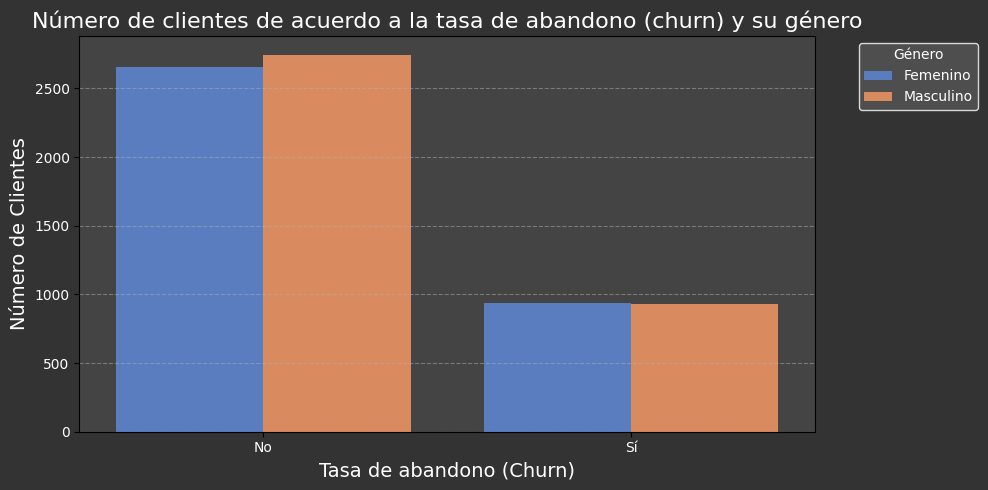

In [39]:
#Creando un gr√°fico de barras
plt.figure(figsize=(10, 5))
sns.countplot(data=datos_transformados, x='Tasa de Abandono (Churn)', hue='G√©nero', palette='muted')

#T√≠tulo del gr√°fico con sus caracter√≠sticas
plt.title('N√∫mero de clientes de acuerdo a la tasa de abandono (churn) y su g√©nero', fontsize=16, color='white')

#Especificaciones de los labels
plt.xlabel('Tasa de abandono (Churn)', fontsize=14, color='white')
plt.ylabel('N√∫mero de Clientes', fontsize=14, color='white')

#Ajustando los labels
plt.xticks(rotation=0, color='white')
plt.yticks(color='white')

#A√±adiendo un cuadro de leyenda para mejor entendimiento del gr√°fico
leg = plt.legend(title='G√©nero', bbox_to_anchor=(1.05, 1), loc='upper left')
leg.get_frame().set_facecolor('#555555')
leg.get_frame().set_edgecolor('white')
plt.setp(leg.get_texts(), color='white')
plt.setp(leg.get_title(), color='white')

#Ajustando el cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Ajustando el fondo del gr√°fico y de las figuras
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gr√°fico
plt.tight_layout()
plt.show()

###Gr√°fico de pastel: proporci√≥n de clientes de acuerdo a su tasa de abandono (churn)

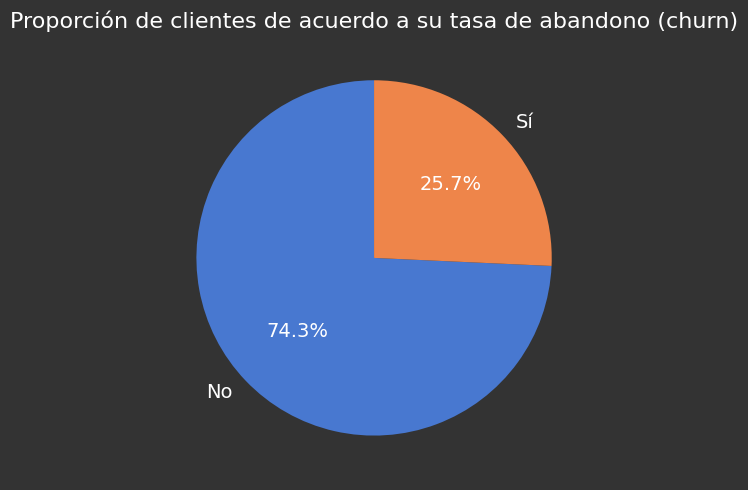

In [40]:
#Creando el gr√°fico de pastel
plt.figure(figsize=(10, 5))

#Paleta de colores
colors = sns.color_palette('muted')

plt.pie(datos_churn['Porcentaje'], labels=datos_churn['Churn'], autopct='%1.1f%%', colors=colors, startangle=90, textprops={'fontsize':14, 'color':'white'})

#T√≠tulo del gr√°fico
plt.title('Proporci√≥n de clientes de acuerdo a su tasa de abandono (churn)', fontsize=16, color='white')

#Cambiar fondo de la figura
plt.gcf().set_facecolor('#333333')

#Mostrar el gr√°fico
plt.tight_layout()
plt.show()

###Gr√°fico de barras verticales: recuento de clientes por g√©nero y tasa de abandono (churn)

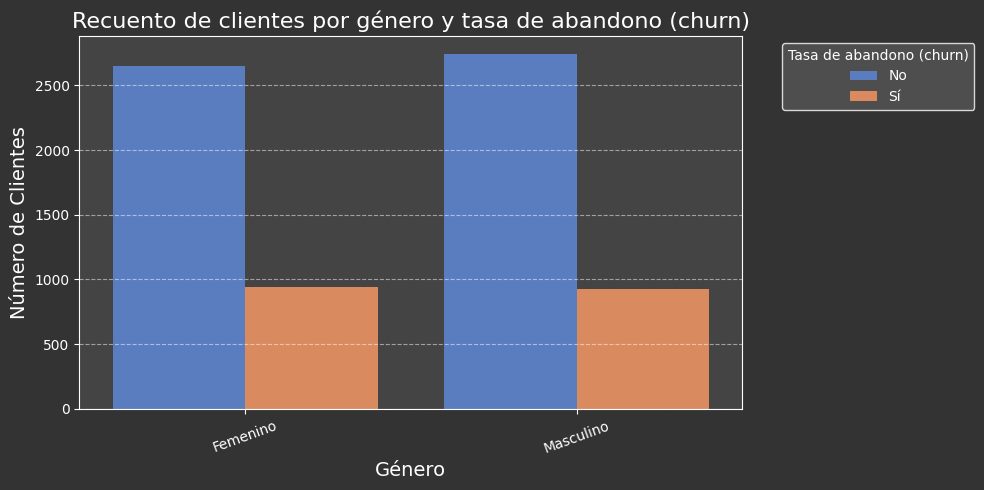

In [41]:
#Creando el gr√°fico de barras
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.countplot(data=datos_transformados,
              x='G√©nero',
              hue='Tasa de Abandono (Churn)',
              palette='muted')

#T√≠tulo del gr√°fico
plt.title('Recuento de clientes por g√©nero y tasa de abandono (churn)', fontsize=16, color='white')

#Especificaciones de labels
plt.xlabel('G√©nero', fontsize=14, color='white')
plt.ylabel('N√∫mero de Clientes', fontsize=14, color='white')

#Ajustando labels
plt.xticks(rotation=20, color='white')
plt.yticks(color='white')

#Leyenda con fondo personalizado
leg = plt.legend(title='Tasa de abandono (churn)', bbox_to_anchor=(1.05, 1), loc='upper left')
leg.get_frame().set_facecolor('#555555')
leg.get_frame().set_edgecolor('white')
plt.setp(leg.get_texts(), color='white')
plt.setp(leg.get_title(), color='white')

#Ajustando el cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Acomodando el color del fondo y las figuras
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gr√°fico
plt.tight_layout()
plt.show()

###Gr√°fico de barras verticales: recuento de clientes por tipo de contrato y estado de abandono (churn)

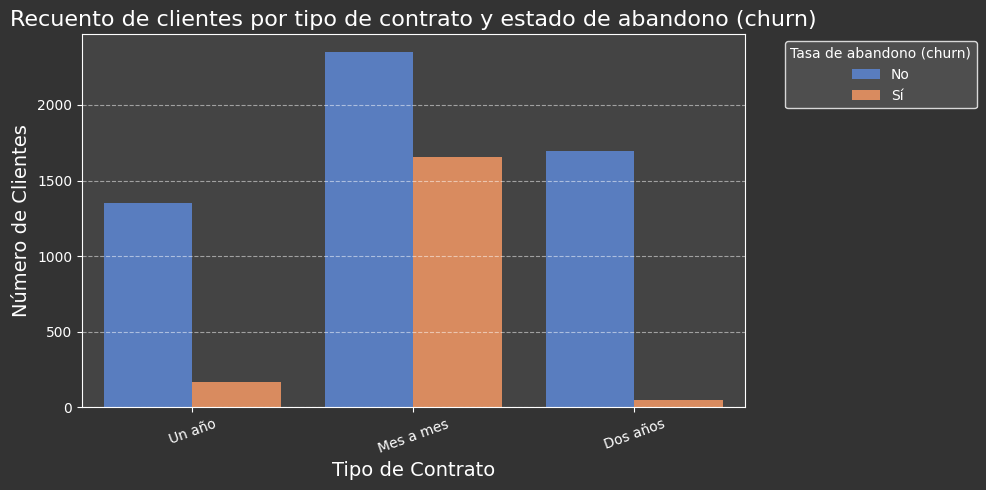

In [42]:
#Creando el gr√°fico
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.countplot(data=datos_transformados,
              x='Tipo de Contrato',
              hue='Tasa de Abandono (Churn)',
              palette='muted')

#T√≠tulo del gr√°fico
plt.title('Recuento de clientes por tipo de contrato y estado de abandono (churn)', fontsize=16, color='white')

#Especificando labels
plt.xlabel('Tipo de Contrato', fontsize=14, color='white')
plt.ylabel('N√∫mero de Clientes', fontsize=14, color='white')

#Ajustando los labels
plt.xticks(rotation=20, color='white')
plt.yticks(color='white')

#Ajustando la leyenda
leg = plt.legend(title='Tasa de abandono (churn)', bbox_to_anchor=(1.05, 1), loc='upper left')
leg.get_frame().set_facecolor('#555555')
leg.get_frame().set_edgecolor('white')
plt.setp(leg.get_texts(), color='white')
plt.setp(leg.get_title(), color='white')

#Ajustando el cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gr√°fico
plt.tight_layout()
plt.show()

###Gr√°fico de barras verticales: recuento de clientes por m√©todo de pago y estado de abandono (churn)

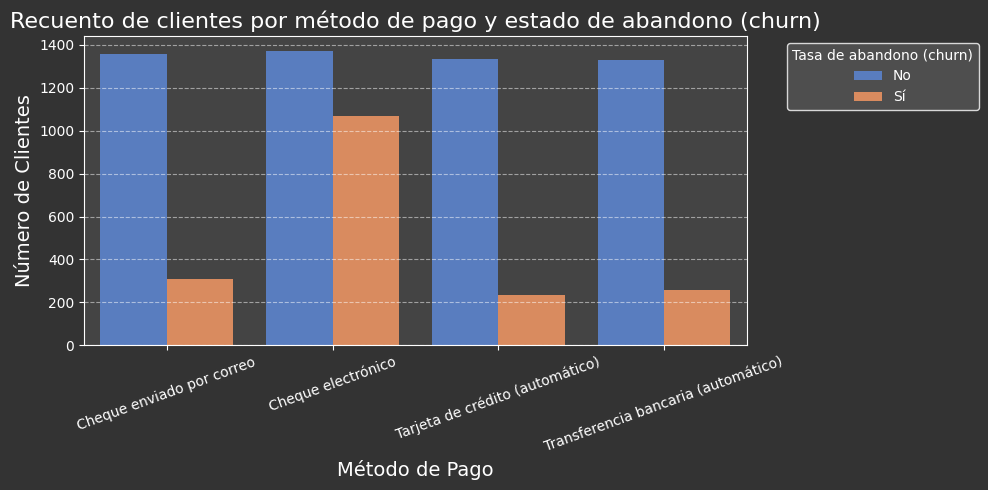

In [43]:
#Creando el gr√°fico
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.countplot(data=datos_transformados,
              x='M√©todo de Pago',
              hue='Tasa de Abandono (Churn)',
              palette='muted')

#T√≠tulo
plt.title('Recuento de clientes por m√©todo de pago y estado de abandono (churn)', fontsize=16, color='white')

#Especificando labels
plt.xlabel('M√©todo de Pago', fontsize=14, color='white')
plt.ylabel('N√∫mero de Clientes', fontsize=14, color='white')

#Ajustando labels
plt.xticks(rotation=20, color='white')
plt.yticks(color='white')

#Ajustando el cuadro de leyenda
leg = plt.legend(title='Tasa de abandono (churn)', bbox_to_anchor=(1.05, 1), loc='upper left')
leg.get_frame().set_facecolor('#555555')
leg.get_frame().set_edgecolor('white')
plt.setp(leg.get_texts(), color='white')
plt.setp(leg.get_title(), color='white')

#Ajustando el cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gr√°fico
plt.tight_layout()
plt.show()

###Gr√°fico de barras verticales: recuento de clientes entre adulto mayor y estado de abandono (churn)

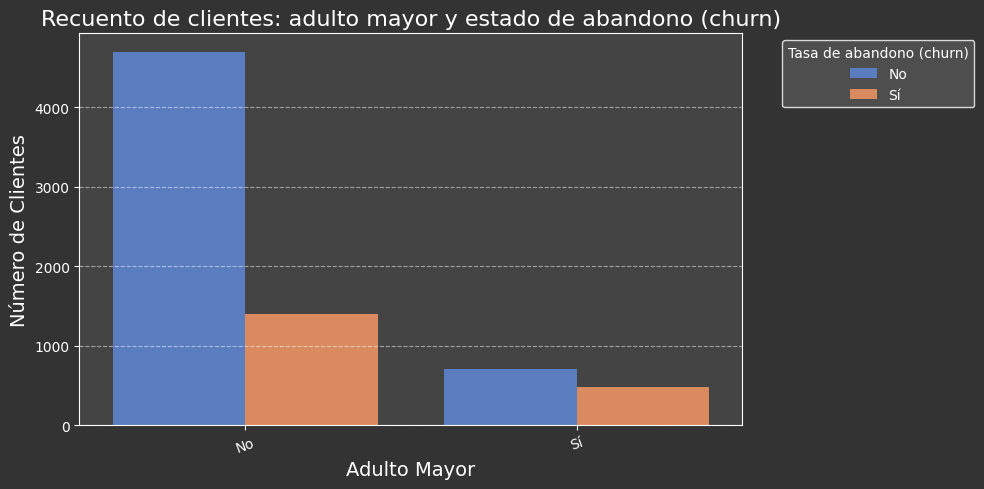

In [44]:
#Creando el gr√°fico para Adulto Mayor
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
sns.countplot(data=datos_transformados,
              x='Adulto Mayor',
              hue='Tasa de Abandono (Churn)',
              palette='muted')

#T√≠tulo
plt.title('Recuento de clientes: adulto mayor y estado de abandono (churn)', fontsize=16, color='white')

#Especificando labels
plt.xlabel('Adulto Mayor', fontsize=14, color='white')
plt.ylabel('N√∫mero de Clientes', fontsize=14, color='white')

#Ajustando labels
plt.xticks(rotation=20, color='white')
plt.yticks(color='white')

#Ajustando el cuadro de leyenda
leg = plt.legend(title='Tasa de abandono (churn)', bbox_to_anchor=(1.05, 1), loc='upper left')
leg.get_frame().set_facecolor('#555555')
leg.get_frame().set_edgecolor('white')
plt.setp(leg.get_texts(), color='white')
plt.setp(leg.get_title(), color='white')

#Ajustando el cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gr√°fico
plt.tight_layout()
plt.show()

##Conteo de evasi√≥n por variables num√©ricas

###Boxplot: distribuci√≥n de meses de contrato seg√∫n tasa de abanadono

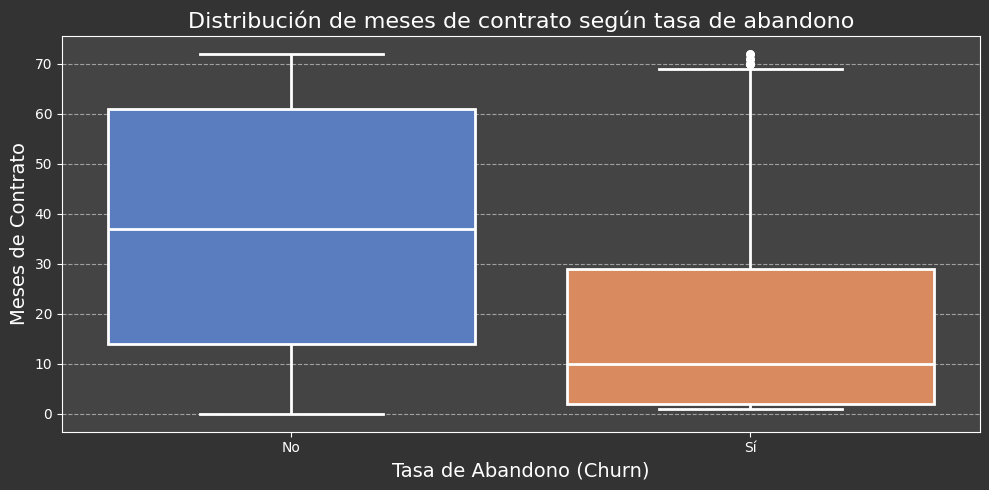

In [45]:
#Crear figura
plt.figure(figsize=(10, 5))

#Crear boxplot con estilo personalizado
sns.boxplot(data=datos_transformados,
            x='Tasa de Abandono (Churn)',
            y='Meses de Contrato',
            palette='muted',
            hue='Tasa de Abandono (Churn)',  #A√±adimos hue para diferenciar visualmente
            linewidth=2,  #Grosor de las l√≠neas
            boxprops=dict(edgecolor='white'),  #Borde blanco en cajas
            whiskerprops=dict(color='white'),  #Bigotes blancos
            capprops=dict(color='white'),  #Extremos de bigotes blancos
            medianprops=dict(color='white'),  #Mediana blanca
            flierprops=dict(marker='o', markerfacecolor='white', markersize=5,
                            linestyle='none', markeredgecolor='white')  #Outliers blancos
           )

#T√≠tulo
plt.title('Distribuci√≥n de meses de contrato seg√∫n tasa de abandono', fontsize=16, color='white')

#Etiquetas de ejes
plt.xlabel('Tasa de Abandono (Churn)', fontsize=14, color='white')
plt.ylabel('Meses de Contrato', fontsize=14, color='white')

#Ajuste de ticks
plt.xticks(color='white')
plt.yticks(color='white')

#Fondo del gr√°fico y figura
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

# Cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Mostrar gr√°fico
plt.tight_layout()
plt.show()

###Boxplot: distribuci√≥n de cargo total seg√∫n tasa de abandono (churn)

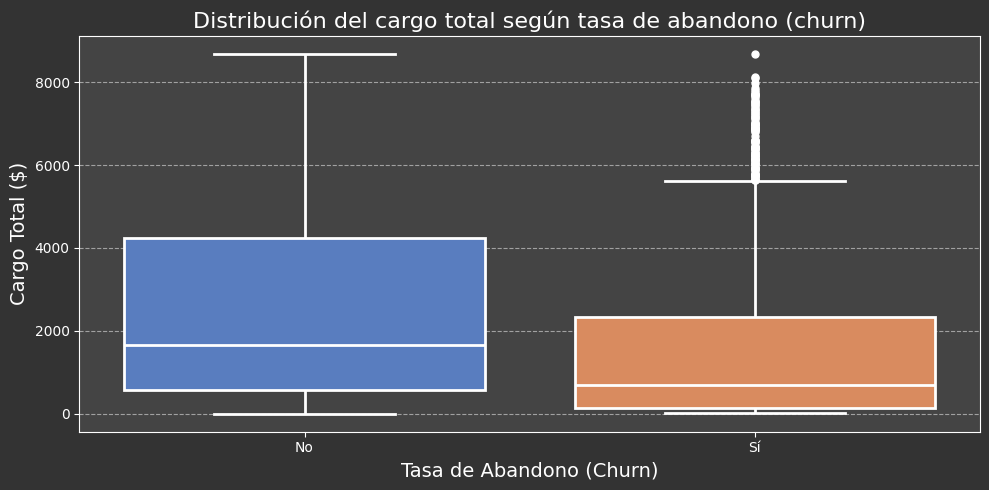

In [46]:
#Crear figura
plt.figure(figsize=(10, 5))

#Crear boxplot
sns.boxplot(data=datos_transformados,
            x='Tasa de Abandono (Churn)',
            y='Cargo Total',
            palette='muted',
            hue = 'Tasa de Abandono (Churn)',
            linewidth=2, #Aumentado el ancho de l√≠nea
            boxprops=dict(edgecolor='white'), #Color del borde de las cajas
            whiskerprops=dict(color='white'), #Color de los bigotes
            capprops=dict(color='white'), #Color de los extremos de los bigotes
            medianprops=dict(color='white'), #Color de la mediana
            flierprops=dict(marker='o', markerfacecolor='white', markersize=5,
                            linestyle='none', markeredgecolor='white') #Ajustado estilo de outliers
           )

#T√≠tulo
plt.title('Distribuci√≥n del cargo total seg√∫n tasa de abandono (churn)', fontsize=16, color='white')

#Etiquetas de ejes
plt.xlabel('Tasa de Abandono (Churn)', fontsize=14, color='white')
plt.ylabel('Cargo Total ($)', fontsize=14, color='white')

#Ajuste de ticks
plt.xticks(color='white')
plt.yticks(color='white')

#Fondo del gr√°fico y figura
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Cuadriculado
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Mostrar gr√°fico
plt.tight_layout()
plt.show()

#üöÄ Extra: an√°lisis de correlaci√≥n entre variables

###Matr√≠z de correlaci√≥n de variables num√©ricas

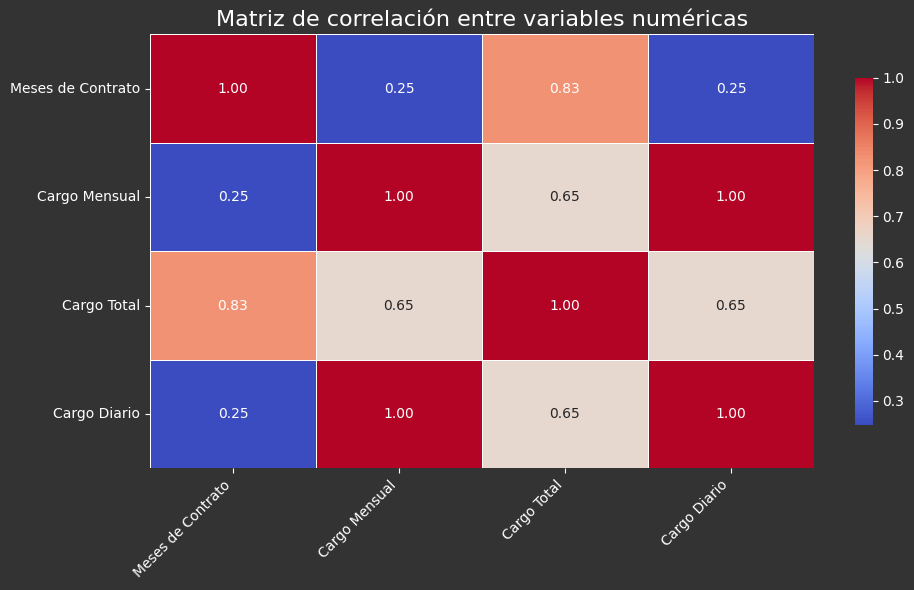

In [55]:
#Filtrar solo columnas num√©ricas
datos_numericos = datos_transformados.select_dtypes(include=['number'])

#Calcular matriz de correlaci√≥n
correlacion = datos_numericos.corr()

#Crear figura
plt.figure(figsize=(10, 6))

#Crear mapa de calor
sns.heatmap(
    correlacion,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

#T√≠tulo
plt.title("Matriz de correlaci√≥n entre variables num√©ricas", fontsize=16, color='white')

#Ajuste de ticks
plt.xticks(color='white', rotation=45, ha='right')
plt.yticks(color='white', rotation=0)

#Fondo
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')

#Mostrar el gr√°fico
plt.tight_layout()
plt.show()

###Gr√°fico de barras: relaci√≥n entre cantidad de servicios y tasa de abandono (churn)

In [71]:
#Lista de columnas relacionadas con servicios
columnas_servicios = [
    'Servicio Telef√≥nico',
    'M√∫ltiples L√≠neas',
    'Tipo de Internet',
    'Seguridad en L√≠nea',
    'Respaldo en L√≠nea',
    'Protecci√≥n del Equipo',
    'Soporte T√©cnico',
    'TV Streaming',
    'Pel√≠culas Streaming'
]

#Crear la columna 'Cantidad de Servicios' contando cu√°ntos servicios tiene cada cliente
#Consideramos 'S√≠' o 'yes' como tener el servicio
datos_transformados['Cantidad de Servicios'] = datos_transformados[columnas_servicios].apply(
    lambda row: row.astype(str).str.lower().isin(['s√≠', 'yes', 'dsl', 'fibra √≥ptica']).sum(), axis=1
)

#Mostrar las primeras filas con la nueva columna
print("DataFrame con la nueva columna 'Cantidad de Servicios':")
display(datos_transformados[['Cantidad de Servicios', 'Tasa de Abandono (Churn)']].head())

DataFrame con la nueva columna 'Cantidad de Servicios':


Cantidad de Servicios Tasa de Abandono (Churn)
0                      5                       No
1                      4                       No
2                      3                       S√≠
3                      6                       S√≠
4                      4                       S√≠

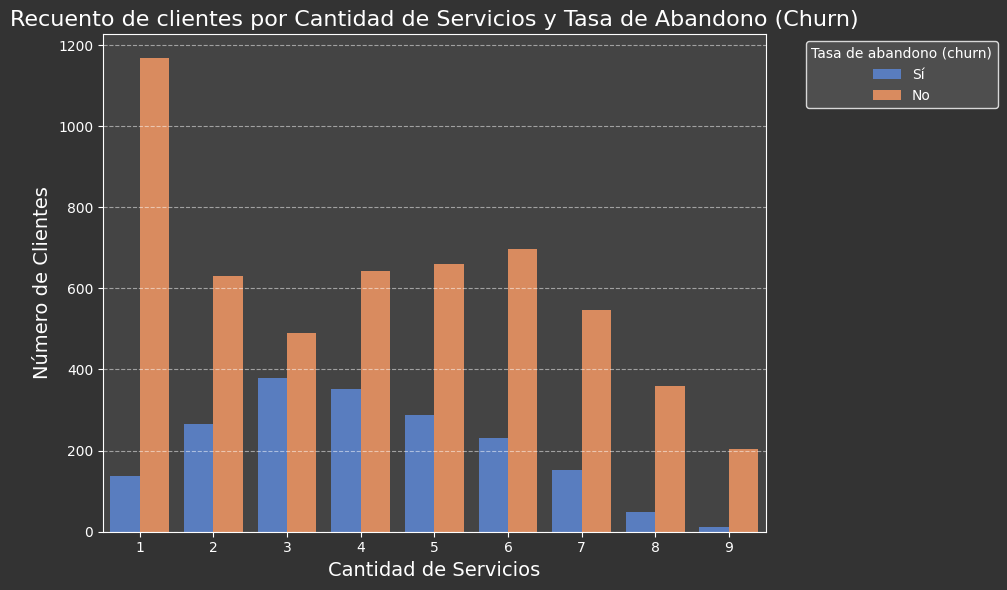

In [72]:
#Visualizar la relaci√≥n entre 'Cantidad de Servicios' y 'Tasa de Abandono (Churn)'
plt.figure(figsize=(10, 6))
sns.countplot(data=datos_transformados, x='Cantidad de Servicios', hue='Tasa de Abandono (Churn)', palette='muted')

#Especificaciones del gr√°fico
plt.title('Recuento de clientes por Cantidad de Servicios y Tasa de Abandono (Churn)', fontsize=16, color='white')
plt.xlabel('Cantidad de Servicios', fontsize=14, color='white')
plt.ylabel('N√∫mero de Clientes', fontsize=14, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('#444444')
plt.gcf().set_facecolor('#333333')
plt.grid(axis='y', linestyle='--', alpha=0.5)

#Ajustes de la leyenda
leg = plt.legend(title='Tasa de abandono (churn)', bbox_to_anchor=(1.05, 1), loc='upper left')
leg.get_frame().set_facecolor('#555555')
leg.get_frame().set_edgecolor('white')
plt.setp(leg.get_texts(), color='white')
plt.setp(leg.get_title(), color='white')

#Mostrar gr√°fico
plt.tight_layout()
plt.show()

#üìÑInforme final

##**Introducci√≥n**

El presente an√°lisis tiene como objetivo identificar patrones y factores asociados a la evasi√≥n de clientes (o churn) en una compa√±√≠a de telecomunicaciones.

El churn representa el porcentaje de clientes que cancelan su contrato en un per√≠odo determinado, lo cual genera p√©rdidas significativas en ingresos y eleva los costos de adquisici√≥n de nuevos clientes.
Mediante este an√°lisis, buscamos comprender qu√© variables influyen m√°s en la tasa de abandono, con el fin de dise√±ar estrategias para reducir la deserci√≥n y fidelizar a los clientes.

##**Desarrollo**

####Limpieza y tratamiento de datos:
- Los pasos realizados para preparar la base de datos fueron:

####Importaci√≥n de datos:
- Carga del archivo CSV con la informaci√≥n de clientes y sus caracter√≠sticas contractuales.

####Revisi√≥n de valores nulos y duplicados:
- Se identificaron y eliminaron registros incompletos o repetidos.

####Transformaci√≥n de datos:
- Conversi√≥n de columnas a tipos de datos adecuados (fechas, num√©ricos y categ√≥ricos).

####Creaci√≥n de variables derivadas:
- Se generaron nuevas m√©tricas, como Tasa de Abandono (Churn) y Meses de Contrato.

####Estandarizaci√≥n de nombres de columnas:
- Mejora de la legibilidad y consistencia para el an√°lisis.

Todos los pasos de esta etapa garantizaron que los datos estuvieran limpios, consistentes y listos para su an√°lisis exploratorio.

## **An√°lisis Exploratorio de Datos (EDA)**

A continuaci√≥n, se presentan las visualizaciones generadas y los hallazgos principales:

1. **Gr√°fico de barras verticales: n√∫mero de clientes de acuerdo a la tasa de abandono (churn) y su g√©nero**  
   El gr√°fico evidencia que existe una distribuci√≥n equilibrada entre hombres y mujeres en cuanto a la tasa de abandono, sin diferencias notables por g√©nero.

2. **Gr√°fico de pastel: proporci√≥n de clientes de acuerdo a su tasa de abandono (churn)**  
   La proporci√≥n muestra que aproximadamente una cuarta parte de los clientes ha abandonado el servicio, evidenciando la magnitud del problema.

3. **Gr√°fico de barras verticales: recuento de clientes por g√©nero y tasa de abandono (churn)**  
   Se confirma que tanto hombres como mujeres presentan tasas de abandono similares, por lo que el g√©nero no parece ser un factor determinante.

4. **Gr√°fico de barras verticales: recuento de clientes por tipo de contrato y estado de abandono (churn)**  
   Los clientes con contratos mensuales presentan una tasa de abandono considerablemente mayor que aquellos con contratos a largo plazo.

5. **Gr√°fico de barras verticales: recuento de clientes por m√©todo de pago y estado de abandono (churn)**  
   Los clientes que pagan mediante m√©todos electr√≥nicos como mes a mes muestran una mayor tendencia al abandono que quienes usan transferencias o pagos autom√°ticos.

6. **Gr√°fico de barras verticales: recuento de clientes entre adulto mayor y estado de abandono (churn)**  
   Los adultos mayores presentan una tasa de abandono ligeramente mayor, lo que podr√≠a asociarse a factores de satisfacci√≥n o adaptabilidad al servicio.

7. **Conteo de evasi√≥n por variables num√©ricas**  
   Se observa que ciertas variables num√©ricas como ‚ÄúMeses de Contrato‚Äù y ‚ÄúCargo Total‚Äù presentan diferencias claras entre clientes que permanecen y los que abandonan.

8. **Boxplot: distribuci√≥n de meses de contrato seg√∫n tasa de abandono**  
   El gr√°fico muestra que los clientes con menor tiempo de permanencia son m√°s propensos a abandonar.

9. **Boxplot: distribuci√≥n de cargo total seg√∫n tasa de abandono (churn)**  
   Se evidencia que los clientes que han pagado cargos m√°s altos presentan tasas de abandono mayores, posiblemente por percepci√≥n de costos elevados.

10. **Matriz de correlaci√≥n entre variables num√©ricas**   
  La matriz muestra fuertes correlaciones positivas entre las variables relacionadas a cargos y duraci√≥n del contrato:

- Meses de Contrato y Cargo Total: alta
correlaci√≥n (0.83).

- Cargo Mensual y Cargo Diario: correlaci√≥n perfecta (1.00).

- Cargo Mensual y Cargo Total: correlaci√≥n moderada-alta (0.65).

11. **Gr√°fico de barras: recuento de clientes seg√∫n cantidad de servicios y tasa de abandono (churn)**       
  El gr√°fico muestra que los clientes con pocos servicios suelen permanecer, pero a medida que se incrementa la cantidad de servicios, hay una mayor proporci√≥n relativa de abandono.

## **Conclusiones e Insights**

- El **tipo de contrato** es un factor clave: los contratos mensuales concentran la mayor parte de la evasi√≥n.  
- Los **m√©todos de pago** como mes a mes y tarjetas de cr√©dito no automatizadas se asocian con mayores tasas de churn.  
- El **tiempo de permanencia** es cr√≠tico: clientes nuevos o con pocos meses de contrato abandonan con m√°s frecuencia.  
- El **cargo total** elevado puede ser un desencadenante para la cancelaci√≥n del servicio.  
- El **g√©nero** no representa un factor determinante en el abandono.
- La **cantidad de servicios contratados** puede influir en la tasa de abandono. Clientes con pocos servicios tienden a mantenerse m√°s, y la evasi√≥n es m√°s vista en clientes con m√∫ltiples servicios.


## **Recomendaciones**

- **Incentivar contratos a largo plazo** mediante descuentos o beneficios adicionales para reducir el churn en clientes de contrato mensual.  
- **Promover m√©todos de pago autom√°ticos** para mejorar la retenci√≥n.  
- **Implementar programas de fidelizaci√≥n** orientados a clientes nuevos durante los primeros meses de contrato.  
- **Revisar y ajustar pol√≠ticas de precios**, especialmente para clientes con cargos totales altos.  
- **Realizar encuestas de satisfacci√≥n** espec√≠ficas para adultos mayores a fin de adaptar el servicio a sus necesidades.
- **Evaluar la satisfacci√≥n y experiencia de clientes con m√∫ltiples servicios** para detectar posibles problemas espec√≠ficos que motiven el abandono.
- **Ofrecer paquetes o bundles optimizados y acompa√±amiento personalizado** a clientes con varios servicios para mejorar su retenci√≥n.
